# Random Forest Implementation




In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# fetch datasets
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
parkinsons = fetch_ucirepo(id=174) 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
geena = fetch_ucirepo(id=827)

In [ ]:
# # Function to train and evaluate model
# def train_evaluate_model(X, y, test_size, split_name, max_features):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=test_size, random_state=42
#     )

#     y_train = y_train.squeeze()
#     y_test= y_test.squeeze()
    
#     rf_model = RandomForestClassifier(n_estimators=1024, max_features=max_features, random_state=42)
#     rf_model.fit(X_train, y_train)
    
#     y_pred = rf_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     print(f"\n {split_name} Split (Train: {100-test_size*100}% Test: {test_size*100}%)")
#     print(f"Accuracy: {accuracy:.2f}")
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))

#     #  confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
    
#     # Plot  matrix
#     plt.figure(figsize=(8, 6))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot(cmap='Blues', values_format="d")
#     plt.title(f'Confusion Matrix - {split_name}')
#     plt.show()
    
#     return accuracy

# splits = {
#     "70-30": 0.3,
#     "80-20": 0.2,
#     "50-50": 0.5
# }

# max_feature_set = [1, 2, 4, 6, 8, 12, 16, 20]


In [47]:
# Function to train and evaluate model
def train_evaluate_model(X, y, test_size, split_name, max_features):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )


    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    

    total_accuracy = 0

    for max_feat in max_features:
        rf_model = RandomForestClassifier(n_estimators=1024, max_features=max_feat, random_state=42)
        rf_model.fit(X_train, y_train)

        y_pred = rf_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy

        print(f"\n{split_name} Split (Train: {100-test_size*100}% Test: {test_size*100}%)")
        print(f"Max Features: {max_feat}")
        print(f"Accuracy: {accuracy:.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    # Plot confusion matrices for each max_features
    fig, axes = plt.subplots(1, len(max_features), figsize=(20, 6), constrained_layout=True)
    for i, max_feat in enumerate(max_features):
        rf_model = RandomForestClassifier(n_estimators=1024, max_features=max_feat, random_state=42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i], cmap='Blues', values_format="d")
        axes[i].set_title(f'Max Features: {max_feat}')

    plt.suptitle(f'Confusion Matrices - {split_name}')
    plt.show()

    average_accuracy = total_accuracy / len(max_features)
    print(f"\nAverage Accuracy for {split_name} Split: {average_accuracy:.2f}")

    return average_accuracy

splits = {
    "20-80": 0.8,
    "80-20": 0.2,
    "50-50": 0.5
}

max_features = [1, 2, 4, 6, 8, 12, 16, 20]

# # Dataset
# X = cdc_diabetes_health_indicators.data.features
# y = cdc_diabetes_health_indicators.data.targets

# # Experiment Loop
# print("\n--- Processing CDC Diabetes Health Indicators ---")

# for split_name, test_size in splits.items():
#     print(f"\nSplit: {split_name}")
#     train_evaluate_model(X, y, test_size, split_name, max_feature_set)


### Dataset 1: Diabetes


Split: 20-80

20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 1
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    174653
           1       0.50      0.10      0.16     28291

    accuracy                           0.86    202944
   macro avg       0.69      0.54      0.54    202944
weighted avg       0.82      0.86      0.82    202944


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 2
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    174653
           1       0.52      0.12      0.19     28291

    accuracy                           0.86    202944
   macro avg       0.70      0.55      0.56    202944
weighted avg       0.82      0.86      0.82    202944


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 4
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   s

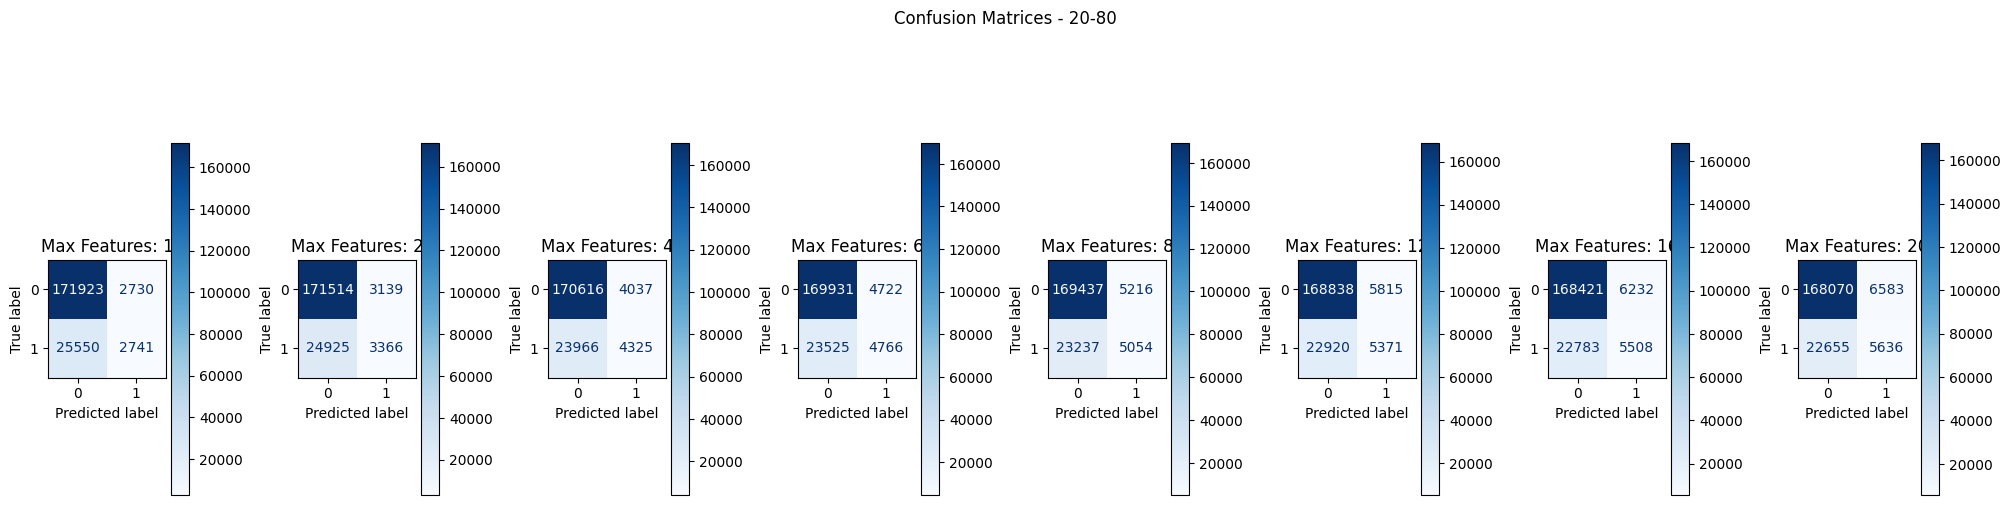


Average Accuracy for 20-80 Split: 0.86

Split: 80-20

80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 1
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43739
           1       0.47      0.13      0.21      6997

    accuracy                           0.86     50736
   macro avg       0.67      0.55      0.57     50736
weighted avg       0.82      0.86      0.82     50736


80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 2
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43739
           1       0.49      0.15      0.23      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.56      0.58     50736
weighted avg       0.82      0.86      0.83     50736


80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 4
Accuracy: 0.86

Classification Report:
       

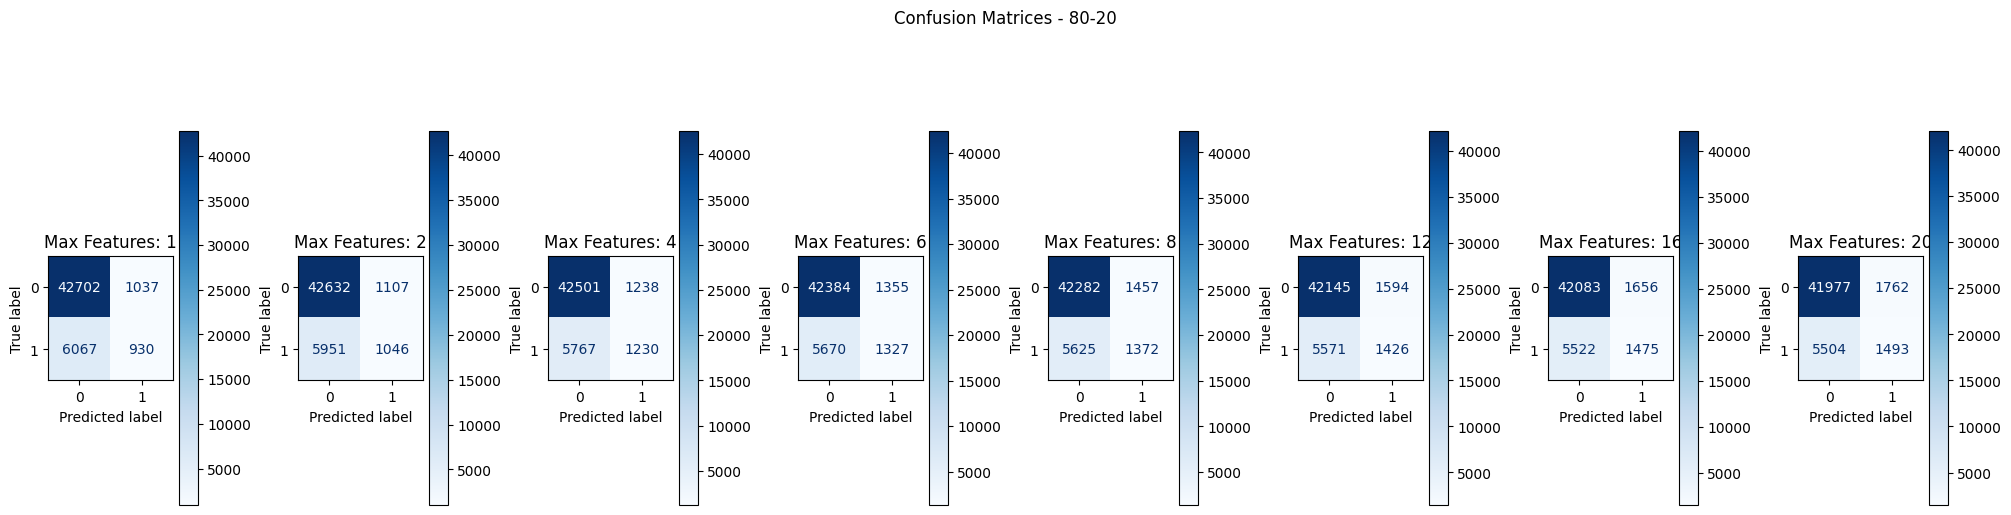


Average Accuracy for 80-20 Split: 0.86

Split: 50-50

50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 1
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    109241
           1       0.49      0.12      0.20     17599

    accuracy                           0.86    126840
   macro avg       0.68      0.55      0.56    126840
weighted avg       0.82      0.86      0.82    126840


50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 2
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92    109241
           1       0.50      0.14      0.22     17599

    accuracy                           0.86    126840
   macro avg       0.69      0.56      0.57    126840
weighted avg       0.82      0.86      0.83    126840


50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 4
Accuracy: 0.86

Classification Report:
       

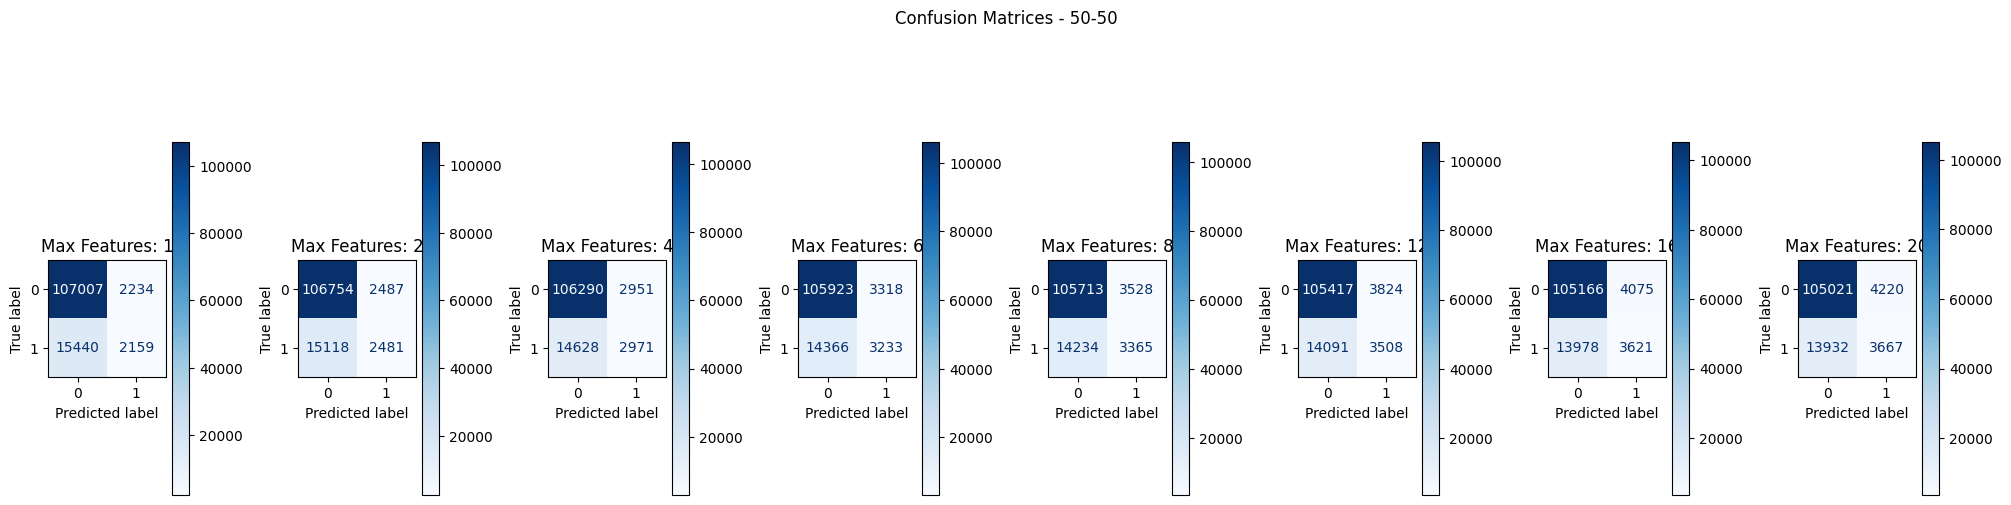


Average Accuracy for 50-50 Split: 0.86

-------------Summary of Results:-------------
20-80 accuracy: 0.86
80-20 accuracy: 0.86
50-50 accuracy: 0.86
Average Accuracy: 0.86


In [30]:
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 


results = {}

for split_name, test_size in splits.items():
    print(f"\nSplit: {split_name}")
    acc = train_evaluate_model(X, y, test_size, split_name, max_features)
    results[split_name] = acc


avg_acc = 0
print("\n-------------Summary of Results:-------------")
for split_max_feat, acc in results.items():
    print(f"{split_max_feat} accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")


# results = {}
# for split_name, test_size in splits.items():
#     accuracy = train_evaluate_model(X, y, test_size, split_name)
#     results[split_name] = accuracy


# avg_acc = 0
# print("\n Summary of Results")
# for split, acc in results.items():
#     print(f"{split} split accuracy: {acc:.2f}")
#     avg_acc += acc

# avg_acc /= len(results)

# print(f"Average Accuracy: {avg_acc:.2f}")

# results = {}

# # Evaluate the model for each split and feature set size
# for split_name, test_size in splits.items():
#     # for max_features in max_feature_set:
#         # print(f"Random Forest, Max Features: = {max_features}")
#     print(f"RFC Split Training...")
#     accuracy = train_evaluate_model(X, y, test_size, split_name, 20)
#     results[split_name] = accuracy
#         # results[f"{split_name}_max_features_{max_features}"] = accuracy

# # Print summary of results
# avg_acc = 0
# print("\nSummary of Results:")
# for split_max_feat, acc in results.items():
#     print(f"{split_max_feat} accuracy: {acc:.2f}")
#     avg_acc += acc

# avg_acc /= len(results)


# print(f"Average Accuracy: {avg_acc:.2f}")


### Dataset 2:


Split: 20-80

20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 1
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.83      0.98      0.90       117

    accuracy                           0.84       156
   macro avg       0.86      0.70      0.73       156
weighted avg       0.85      0.84      0.82       156


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 2
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.56      0.67        39
           1       0.87      0.96      0.91       117

    accuracy                           0.86       156
   macro avg       0.84      0.76      0.79       156
weighted avg       0.85      0.86      0.85       156


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 4
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   s

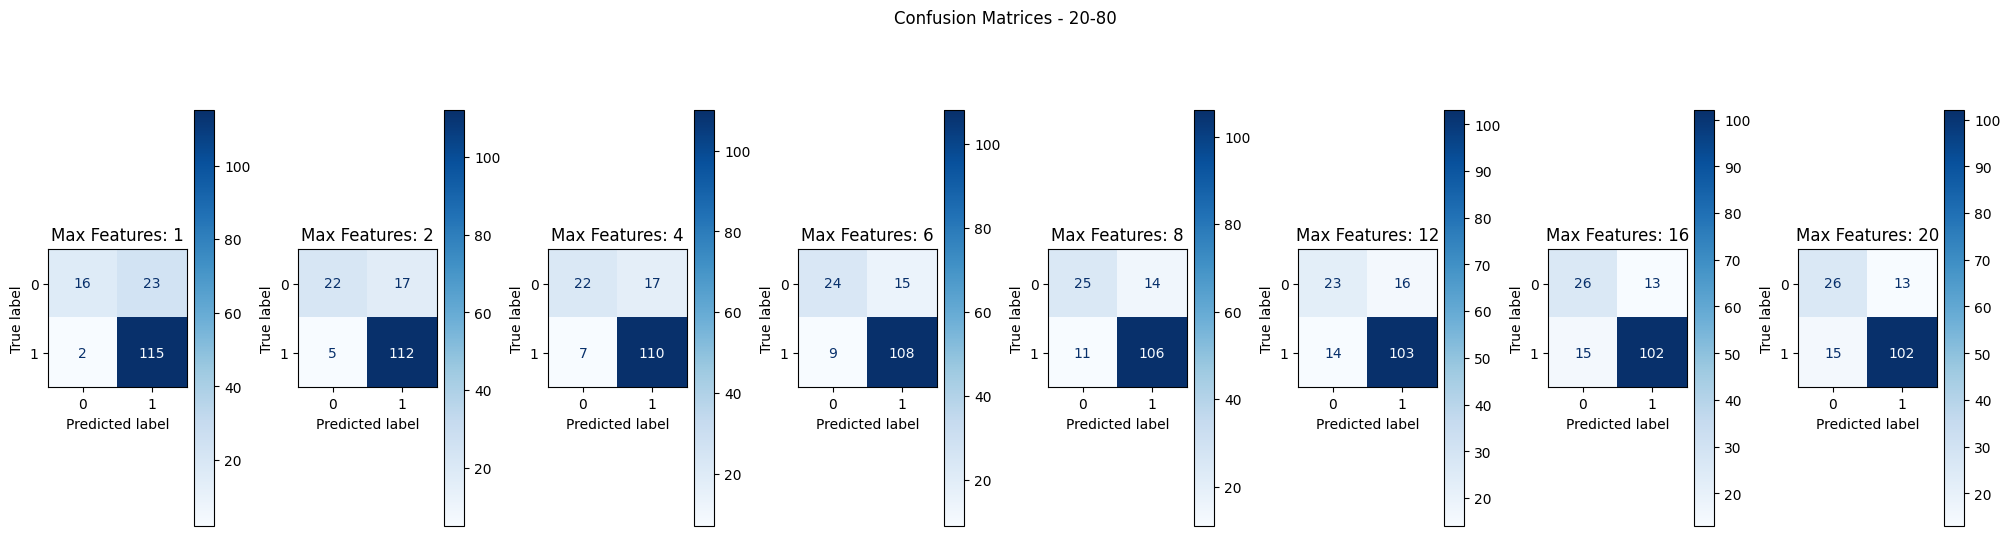


Average Accuracy for 20-80 Split: 0.83

Split: 80-20

80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 1
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39


80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 2
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 4
Accuracy: 0.95

Classification Report:
       

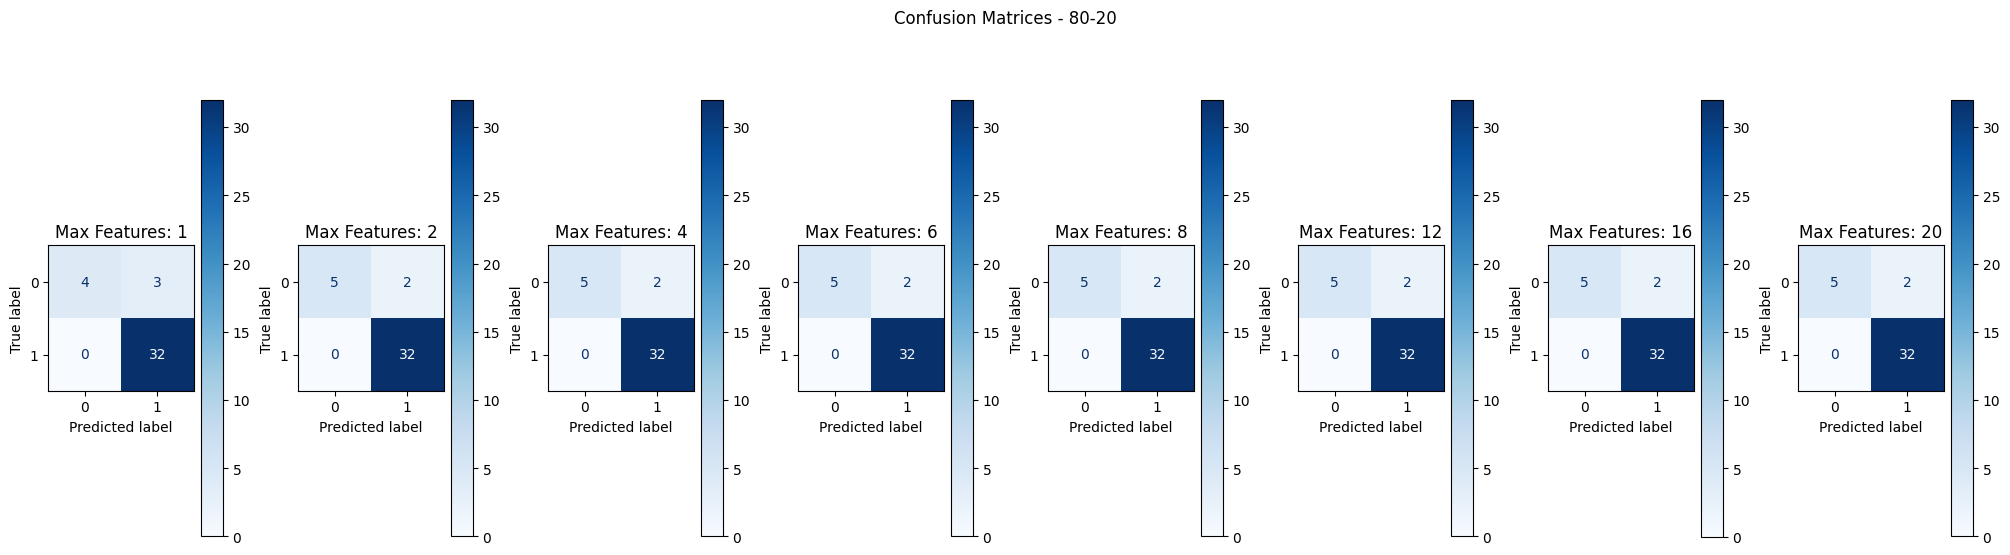


Average Accuracy for 80-20 Split: 0.95

Split: 50-50

50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 1
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        23
           1       0.93      1.00      0.96        75

    accuracy                           0.94        98
   macro avg       0.96      0.87      0.91        98
weighted avg       0.94      0.94      0.94        98


50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 2
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.95      0.99      0.97        75

    accuracy                           0.95        98
   macro avg       0.95      0.91      0.93        98
weighted avg       0.95      0.95      0.95        98


50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 4
Accuracy: 0.95

Classification Report:
       

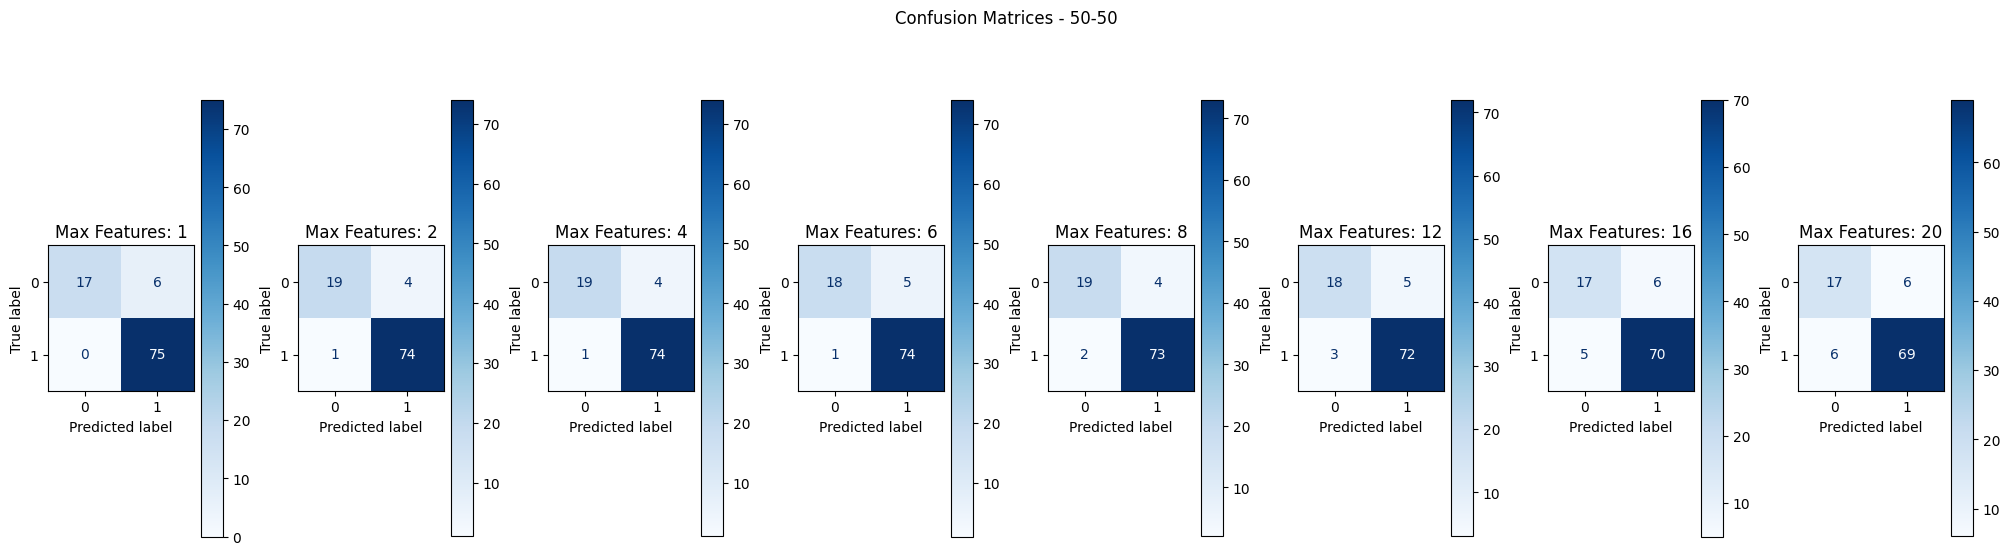


Average Accuracy for 50-50 Split: 0.92

-------------Summary of Results:-------------
20-80 accuracy: 0.83
80-20 accuracy: 0.95
50-50 accuracy: 0.92
Average Accuracy: 0.90


In [28]:
X = parkinsons.data.features 
y = parkinsons.data.targets 


  
results = {}

for split_name, test_size in splits.items():
    print(f"\nSplit: {split_name}")
    acc = train_evaluate_model(X, y, test_size, split_name, max_features)
    results[split_name] = acc


avg_acc = 0
print("\n-------------Summary of Results:-------------")
for split_max_feat, acc in results.items():
    print(f"{split_max_feat} accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")
    


### Dataset 3:


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 1
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.92      0.90      0.91      1320
    Osmancik       0.93      0.94      0.93      1728

    accuracy                           0.93      3048
   macro avg       0.92      0.92      0.92      3048
weighted avg       0.93      0.93      0.93      3048


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 2
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.93      0.90      0.91      1320
    Osmancik       0.92      0.95      0.93      1728

    accuracy                           0.93      3048
   macro avg       0.93      0.92      0.92      3048
weighted avg       0.93      0.93      0.93      3048


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 4
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      

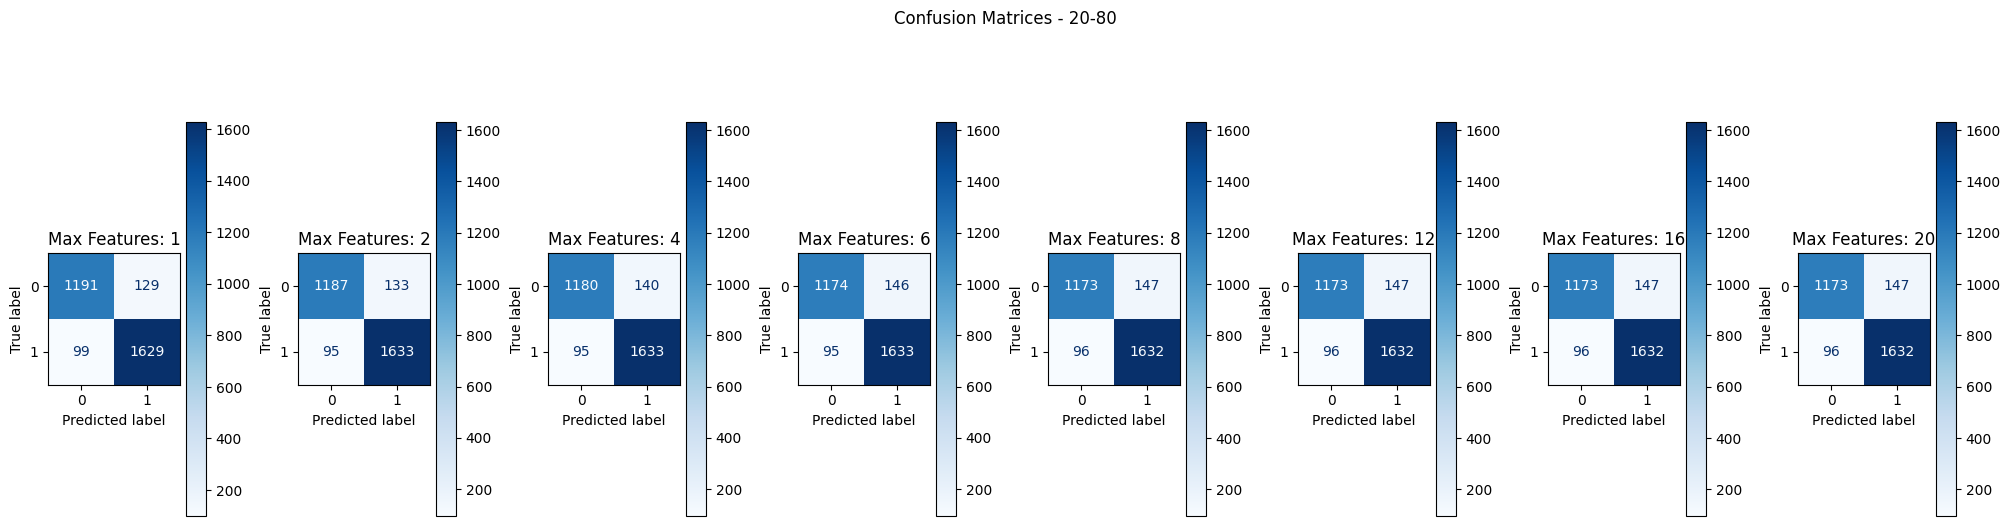


Average Accuracy for 20-80 Split: 0.92

80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 1
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.93      0.91      0.92       350
    Osmancik       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762


80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 2
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.92      0.91      0.92       350
    Osmancik       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.92      0.92       762
weighted avg       0.93      0.93      0.93       762


80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 4
Accuracy: 0.92

Classification Report:
              precisi

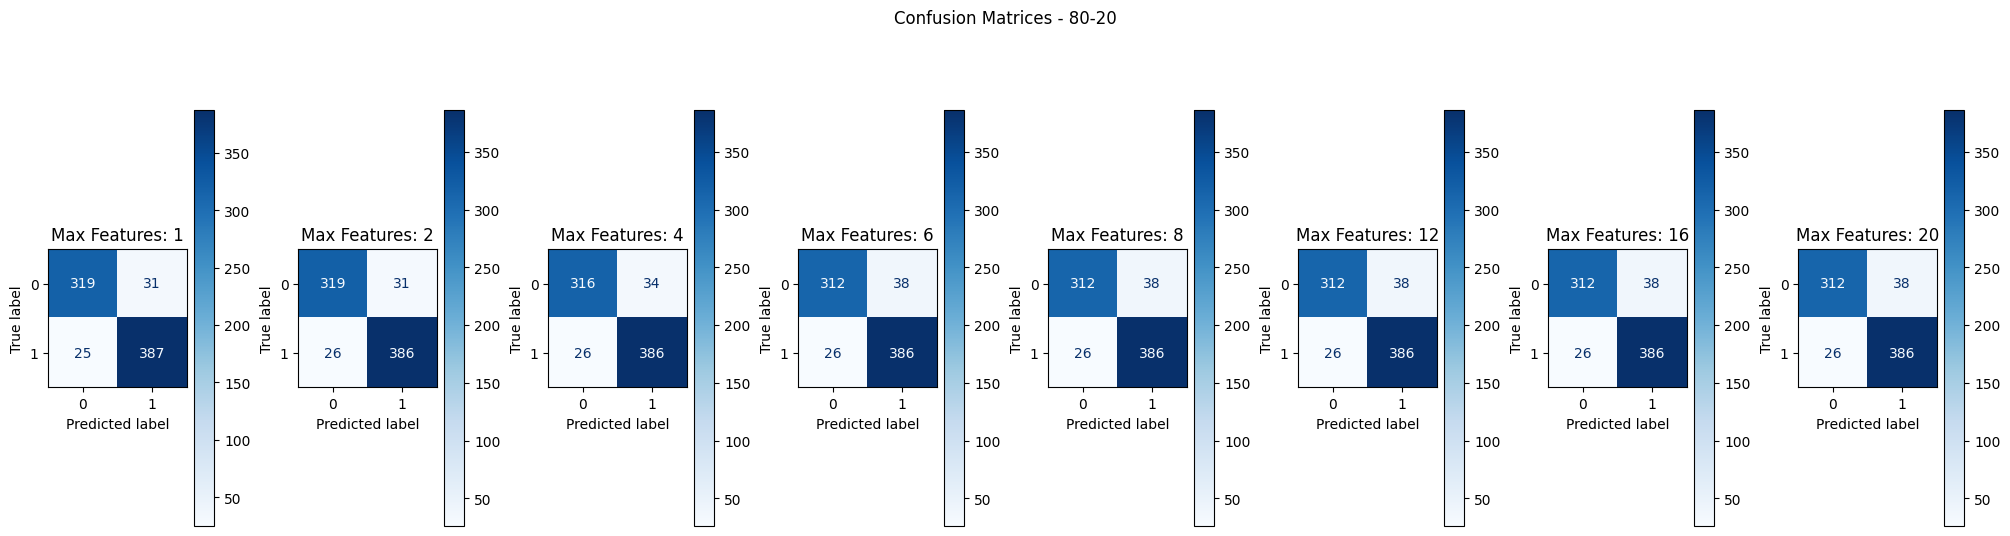


Average Accuracy for 80-20 Split: 0.92

50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 1
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.93      0.88      0.91       831
    Osmancik       0.91      0.95      0.93      1074

    accuracy                           0.92      1905
   macro avg       0.92      0.92      0.92      1905
weighted avg       0.92      0.92      0.92      1905


50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 2
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.93      0.88      0.90       831
    Osmancik       0.91      0.95      0.93      1074

    accuracy                           0.92      1905
   macro avg       0.92      0.91      0.92      1905
weighted avg       0.92      0.92      0.92      1905


50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 4
Accuracy: 0.92

Classification Report:
              precisi

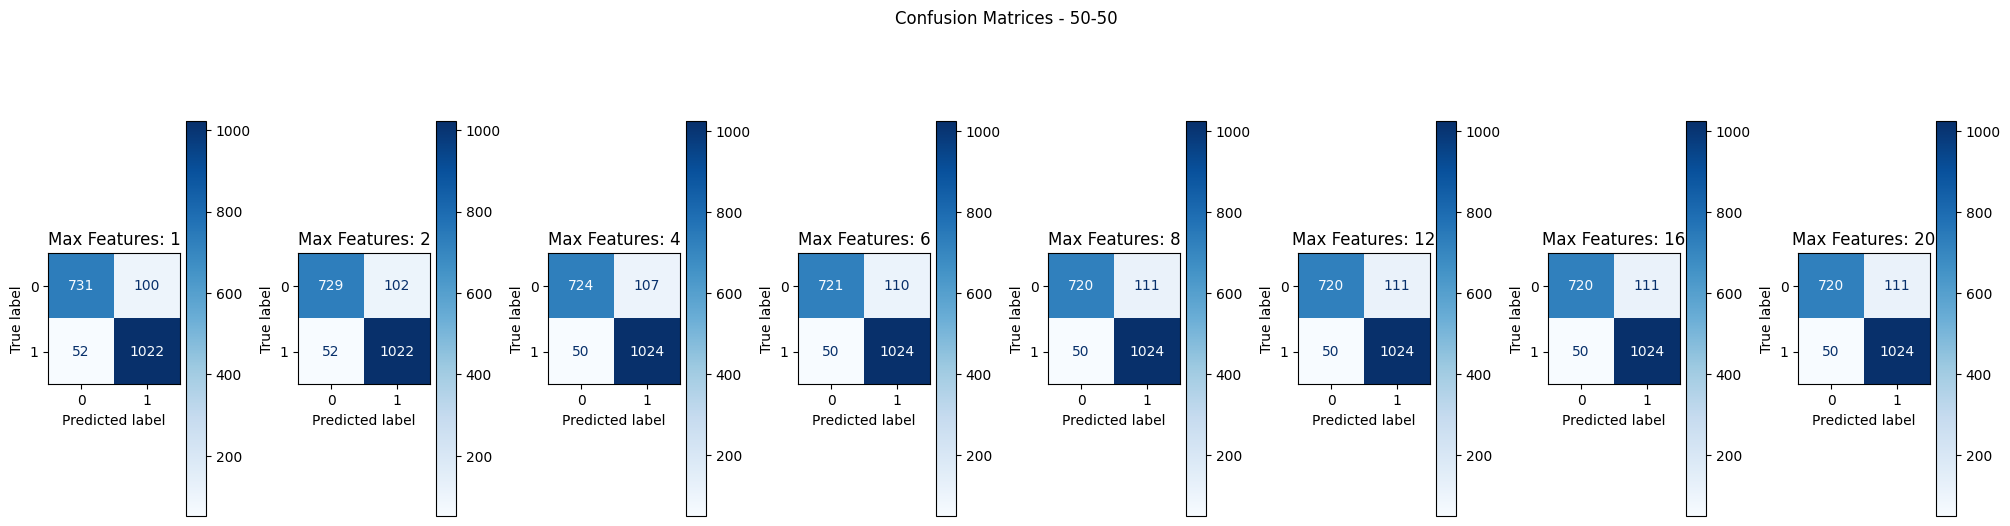


Average Accuracy for 50-50 Split: 0.92

 Summary of Results
20-80 split accuracy: 0.92
80-20 split accuracy: 0.92
50-50 split accuracy: 0.92
Average Accuracy: 0.92


In [29]:
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name, max_features)
    results[split_name] = accuracy

# Print comparison
avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 1
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.00      0.00      6567
           1       0.93      1.00      0.96     81706

    accuracy                           0.92     88273
   macro avg       0.48      0.50      0.48     88273
weighted avg       0.86      0.92      0.89     88273


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 2
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.00      0.00      6567
           1       0.93      1.00      0.96     81706

    accuracy                           0.92     88273
   macro avg       0.48      0.50      0.48     88273
weighted avg       0.86      0.92      0.89     88273


20-80 Split (Train: 20.0% Test: 80.0%)
Max Features: 4
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      

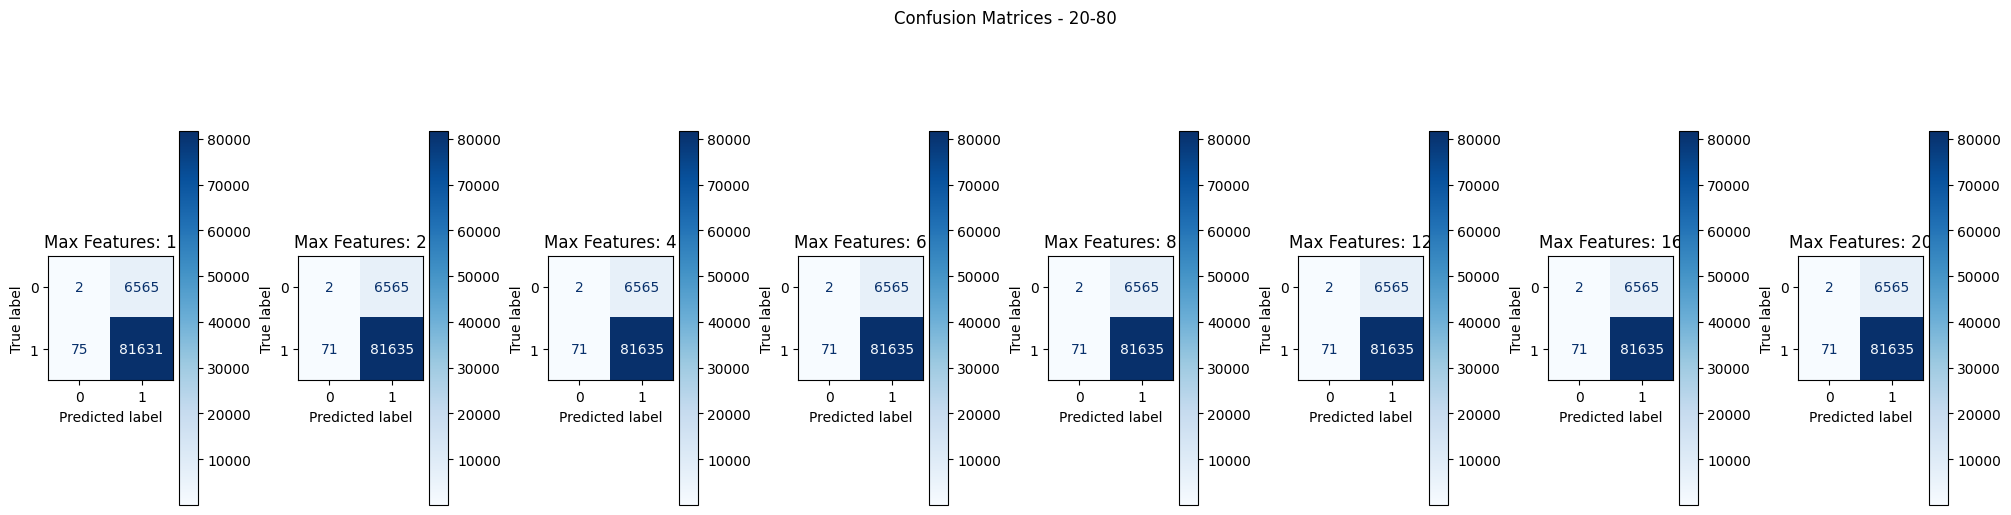


Average Accuracy for 20-80 Split: 0.92

80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 1
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      1664
           1       0.92      1.00      0.96     20405

    accuracy                           0.92     22069
   macro avg       0.63      0.50      0.48     22069
weighted avg       0.88      0.92      0.89     22069


80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 2
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      1664
           1       0.92      1.00      0.96     20405

    accuracy                           0.92     22069
   macro avg       0.63      0.50      0.48     22069
weighted avg       0.88      0.92      0.89     22069


80-20 Split (Train: 80.0% Test: 20.0%)
Max Features: 4
Accuracy: 0.92

Classification Report:
              precisi

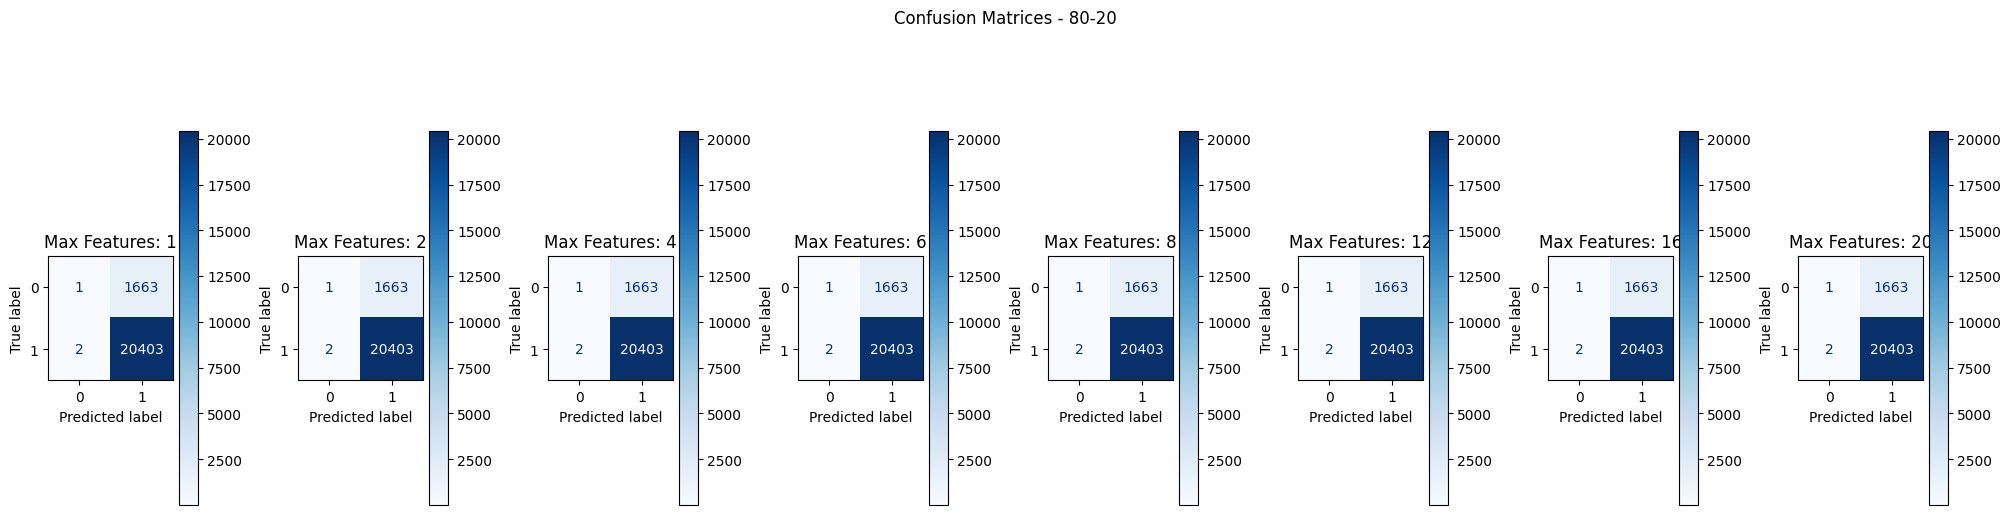


Average Accuracy for 80-20 Split: 0.92

50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 1
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.00      0.00      4118
           1       0.93      1.00      0.96     51053

    accuracy                           0.93     55171
   macro avg       0.50      0.50      0.48     55171
weighted avg       0.86      0.93      0.89     55171


50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 2
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.00      0.00      4118
           1       0.93      1.00      0.96     51053

    accuracy                           0.93     55171
   macro avg       0.50      0.50      0.48     55171
weighted avg       0.86      0.93      0.89     55171


50-50 Split (Train: 50.0% Test: 50.0%)
Max Features: 4
Accuracy: 0.93

Classification Report:
              precisi

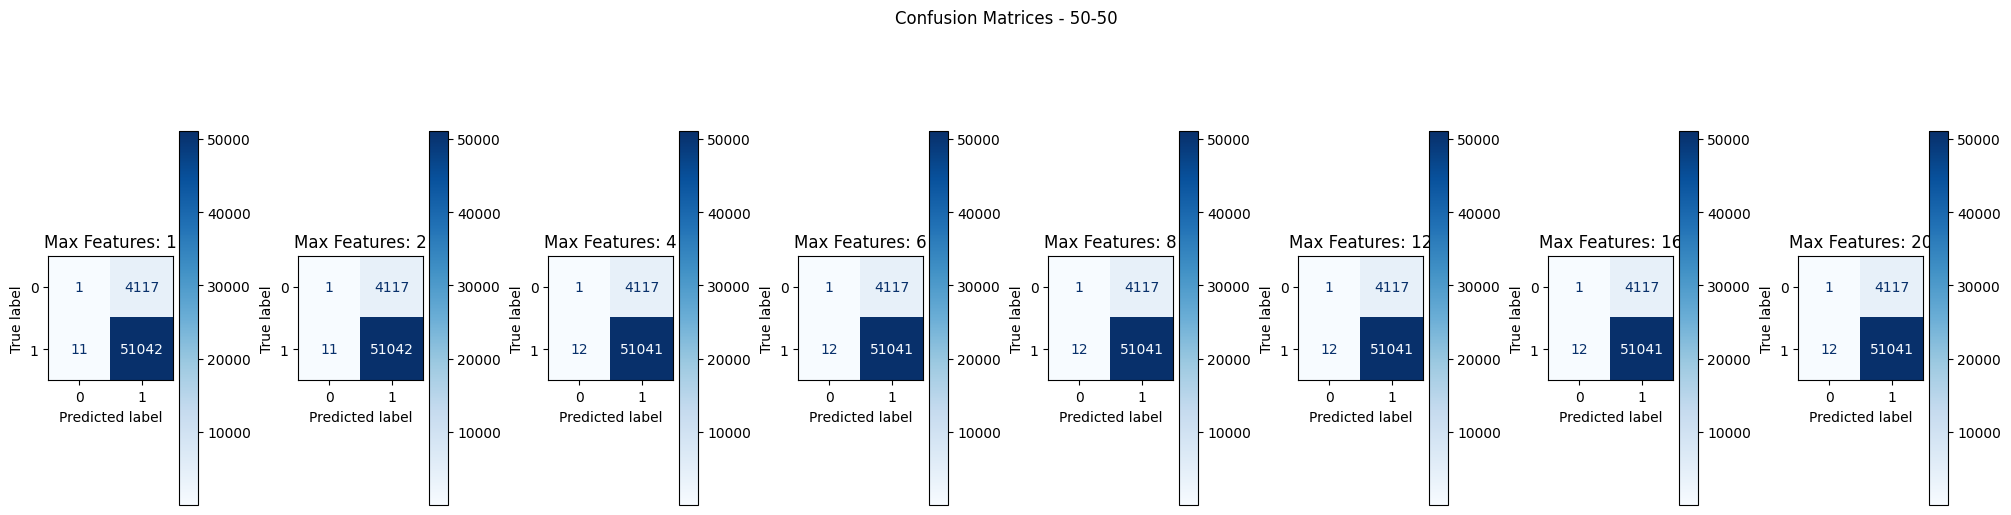


Average Accuracy for 50-50 Split: 0.93

 Summary of Results
20-80 split accuracy: 0.92
80-20 split accuracy: 0.92
50-50 split accuracy: 0.93
Average Accuracy: 0.92


: 

In [ ]:
X = geena.data.features
y = geena.data.targets


results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name, max_features)
    results[split_name] = accuracy

# Print comparison
avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")